# Fpocket strategy

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from simtk import unit
import molsysmt as msm
import openpocket as opp
import nglview as nv
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, ConvexHull
from scipy.spatial.distance import euclidean as distance

_ColormakerRegistry()

In [14]:
radius = 1.0 
n_discs = 50

positions = np.zeros(shape=(n_discs,2),dtype=float)

for ii in range(1, n_discs):
    done = False
    while done is False:
        disc_in_contact = np.random.randint(0,ii)
        angle = 2*np.pi*np.random.random()
        new_center = 2*radius*np.array([np.cos(angle), np.sin(angle)])+positions[disc_in_contact,:]
        done=True
        for jj in range(ii):
            dist= np.linalg.norm(positions[jj,:]-new_center)
            if dist < 2*radius:
                done=False
                break
        if done is True:
            positions[ii,:]=new_center

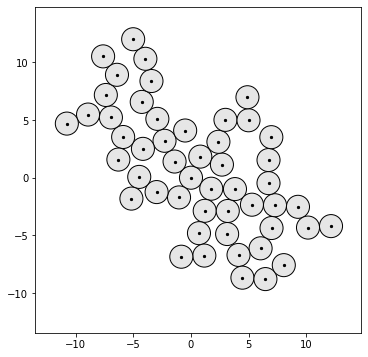

In [15]:
plt.rcParams["figure.figsize"] = (6,6)


ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, edgecolor='k',
                            facecolor='0.9', fill=True, zorder=0))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

In [16]:
vor = Voronoi(positions, incremental=False)

In [17]:
n_vertices = vor.vertices.shape[0]
n_regions = len(vor.regions)
n_points = vor.npoints

points_of_vertex = [[] for ii in range(n_vertices)]
region_point={vor.point_region[ii]:ii for ii in range(n_points)}

for region_index in range(n_regions):
    region=vor.regions[region_index]
    if len(region)>0:
        point_index=region_point[region_index]
        for vertex_index in region:
            if vertex_index != -1:
                points_of_vertex[vertex_index].append(point_index)

n_alpha_circles = n_vertices
alpha_circle_centers = vor.vertices
alpha_circle_radius = [distance(vor.vertices[ii], positions[points_of_vertex[ii][0]]) for ii in range(n_vertices)]
alpha_circle_contacted_points = points_of_vertex
edges_between_circle_centers = vor.ridge_vertices
points_building_edges = vor.ridge_points

alpha_circle_centers = np.array(alpha_circle_centers)
alpha_circle_radius = np.array(alpha_circle_radius)
alpha_circle_contacted_points = np.array(alpha_circle_contacted_points)
edges_between_circle_centers = np.array(edges_between_circle_centers)
points_building_edges = np.array(points_building_edges)

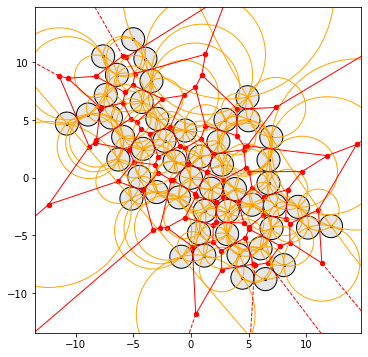

In [18]:
plt.rcParams["figure.figsize"] = (6,6)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.scatter(vor.vertices[:,0], vor.vertices[:,1], s=20, c='red')

ax=plt.gca()

for ii in range(n_alpha_circles):
    ax.add_patch(plt.Circle(alpha_circle_centers[ii,:], radius= alpha_circle_radius[ii], color='orange', fill=False))

for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, edgecolor='k',
                            facecolor='0.9', fill=True, zorder=0))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

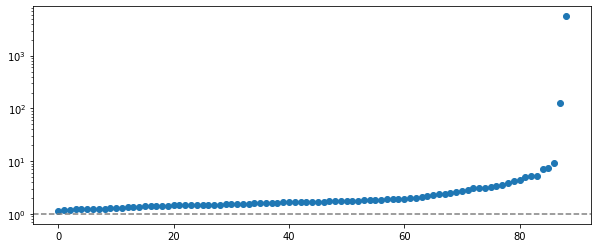

In [19]:
plt.rcParams["figure.figsize"] = (10,4)
plt.scatter(range(n_alpha_circles), np.sort(alpha_circle_radius))
plt.axhline(y=1, color='gray', linestyle='--')
plt.yscale('log')

In [20]:
radius_probe = 0.2
min_threshold = radius + 0.2
max_threshold = 6

In [21]:
mask_min = alpha_circle_radius >= min_threshold
mask_max = alpha_circle_radius <= max_threshold
mask = mask_min*mask_max

In [22]:
n_alpha_circles = mask.sum()
alpha_circle_centers = alpha_circle_centers[mask]
alpha_circle_radius = alpha_circle_radius[mask]
alpha_circle_contacted_points = alpha_circle_contacted_points[mask]

In [23]:
new_ridge_points = []
new_ridge_vertices = []
for ii in range(len(vor.ridge_vertices)):
    pair = vor.ridge_vertices[ii]
    if mask[pair[0]] and mask[pair[1]]:
        new_ridge_vertices.append(pair)
        new_ridge_points.append(vor.ridge_points[ii])

vor.ridge_vertices = np.array(new_ridge_vertices)
vor.ridge_points = np.array(new_ridge_points)

edges_between_circle_centers = vor.ridge_vertices
points_building_edges = vor.ridge_points

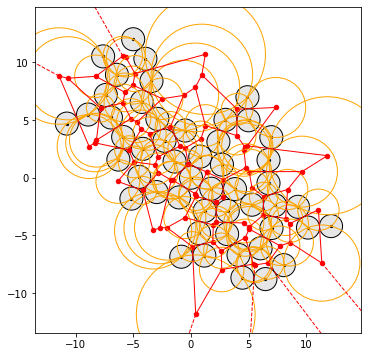

In [24]:
plt.rcParams["figure.figsize"] = (6,6)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.scatter(alpha_circle_centers[:,0], alpha_circle_centers[:,1], s=20, c='red')

ax=plt.gca()

for ii in range(n_alpha_circles):
    ax.add_patch(plt.Circle(alpha_circle_centers[ii,:], radius= alpha_circle_radius[ii], color='orange', fill=False))

for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, edgecolor='k',
                            facecolor='0.9', fill=True, zorder=0))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()